In [1]:
import pandas as pd 
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download 
nltk.download('punkt')
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20193694\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\20193694\yt_thesis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Merging the collected data per channel


In [2]:
yt_james = pd.read_csv("Data Backup/yt_data_james_charles.csv")
yt_nikkie = pd.read_csv("Data Backup/yt_data_nikkie_tutorials.csv")
yt_jeffree = pd.read_csv("Data Backup/yt_data_jeffree_star.csv")
yt_huda = pd.read_csv("Data Backup/yt_data_huda_beauty.csv")
yt_manny = pd.read_csv("Data Backup/yt_data_manny_mua.csv")
yt_patrick = pd.read_csv("Data Backup/yt_data_patrick_starr.csv")
yt_tati = pd.read_csv("Data Backup/yt_data_tati.csv")
yt_desy = pd.read_csv("Data Backup/yt_data_desy_perkins.csv")
yt_ale_jay = pd.read_csv("Data Backup/yt_data_ale_jay.csv")
yt_bethany_mota = pd.read_csv("Data Backup/yt_data_bethany_mota.csv")
yt_bretman_rock = pd.read_csv("Data Backup/yt_data_bretman_rock.csv")
yt_haley_kim = pd.read_csv("Data Backup/yt_data_haley_kim.csv")
yt_itslikelymakeup = pd.read_csv("Data Backup/yt_data_itslikelymakeup.csv")
yt_michelle_phan = pd.read_csv("Data Backup/yt_data_michelle_phan.csv")
yt_lisa_j = pd.read_csv("Data Backup/yt_data_lisa_j.csv")


In [3]:
# create two new columns in each dataframe and assign the channel_id of the influencer as well as the influencer's name
yt_james['channel_id'] = 'UCucot-Zp428OwkyRm2I7v2Q'
yt_james['channel_name'] = 'James Charles'

yt_nikkie['channel_id'] = 'UCzTKskwIc_-a0cGvCXA848Q'
yt_nikkie['channel_name'] = 'Nikkie Tutorials'

yt_jeffree['channel_id'] = 'UCkvK_5omS-42Ovgah8KRKtg'
yt_jeffree['channel_name'] = 'Jeffree Star'

yt_huda['channel_id'] = 'UCRSvEADlY-caz3sfDNwvR1A'
yt_huda['channel_name'] = 'Huda Beauty'

yt_manny['channel_id'] = 'UCbO9bltbkYwa56nZFQx6XJg'
yt_manny['channel_name'] = 'Manny MUA'

yt_patrick['channel_id'] = 'UCDHQbU57NZilrhbuZNbQcRA'   
yt_patrick['channel_name'] = 'Patrick Starrr'

yt_tati['channel_id'] = 'UC4qk9TtGhBKCkoWz5qGJcGg'
yt_tati['channel_name'] = 'Tati'

yt_desy['channel_id'] = 'UCG9nVSLp4nQlW79sY5ihRrg'
yt_desy['channel_name'] = 'Desi Perkins'

yt_ale_jay['channel_id'] = 'UCDJ7jU-bV_OfTg039JAFahQ'
yt_ale_jay['channel_name'] = 'Ale-Jay'

yt_bethany_mota['channel_id'] = 'UCc6W7efUSkd9YYoxOnctlFg'
yt_bethany_mota['channel_name'] = 'Bethany Mota'

yt_bretman_rock['channel_id'] = 'UC3EFKdXAU99j3ppGgvTz7XQ'
yt_bretman_rock['channel_name'] = 'Bretman Rock'

yt_haley_kim['channel_id'] = 'UCOzVEwcVSu_2xDQFyMReDRA'
yt_haley_kim['channel_name'] = 'Haley Kim'

yt_itslikelymakeup['channel_id'] = 'UCecpiJDV3OtLpWuJPb2ovXQ'
yt_itslikelymakeup['channel_name'] = 'ItsLikelyMakeup'

yt_michelle_phan['channel_id'] = 'UCuYx81nzzz4OFQrhbKDzTng'
yt_michelle_phan['channel_name'] = 'Michelle Phan'

yt_lisa_j['channel_id'] = 'UCY8LkGSO_34lHxujnvATGAw'
yt_lisa_j['channel_name'] = 'Lisa J'



In [4]:
# Merge the dataframes into one dataframe
yt_data = pd.concat([yt_james, yt_jeffree, yt_nikkie, yt_huda, yt_manny, yt_patrick, yt_tati, yt_desy, yt_ale_jay, yt_itslikelymakeup, yt_bethany_mota, yt_bretman_rock, yt_haley_kim, yt_lisa_j, yt_michelle_phan], ignore_index=True)
yt_data.to_csv("yt_data_complete_raw.csv", index=False)

## General Preprocessing

### remove videos with 0 views

In [ ]:
# Identify rows with non-positive view counts
non_positive_views = yt_data['view_count'] <= 0

# Remove these rows to create a new DataFrame - found 9 videos with zero views
yt_data = yt_data[~non_positive_views].copy()

### Filter 2015-2024

In [7]:
# filter published_at column to only include videos published after 1st January 2015 and until the end of 2024
yt_data = yt_data[yt_data['published_at'].notna()]  # Ensure no NaT values
yt_data = yt_data[yt_data['published_at'] > '2015-01-01']  # Filter for dates after 1st January 2015
yt_data = yt_data[yt_data['published_at'] < '2025-01-01']  # Filter for dates before 1st January 2025
yt_data = yt_data.reset_index(drop=True)  # Reset index after filtering
yt_data.head(2)

,video_id,title,description,published_at,duration,definition,dimension,caption,licensedContent,view_count,like_count,dislike_count,comment_count,privacy_status,channel_id,channel_name
0,fiufpzX7ojo,I HAD TO DELETE ALL OF THIS FOOTAGE FOR A REAS...,Today's video is 2024 BLOOPERS! Never before s...,2024-12-27T20:00:11Z,PT13M46S,hd,2d,False,True,777942,24891,0,993,public,UCucot-Zp428OwkyRm2I7v2Q,James Charles
1,5Z0f6Ag6mNE,PLAYING DRESS TO IMPRESS CHRISTMAS UNTIL I LOS...,Roblox Dress To Impress just got a CHRISTMAS U...,2024-12-20T20:04:11Z,PT23M48S,hd,2d,False,True,1611763,42568,0,1474,public,UCucot-Zp428OwkyRm2I7v2Q,James Charles


### Removing YT shorts

In [8]:
# First converting the duration to minutes

import isodate

def iso_duration_to_minutes(duration_str):
    """Converts an ISO 8601 duration string to minutes."""
    if pd.isna(duration_str):
        return 0  # Return 0 for NaN values
    duration = isodate.parse_duration(duration_str)
    minutes = duration.total_seconds() / 60
    return minutes

yt_data['duration_minutes'] = yt_data['duration'].apply(iso_duration_to_minutes)

In [9]:
yt_data['published_at'] = pd.to_datetime(yt_data['published_at'])

date_threshold = pd.to_datetime('2021-03-01').tz_localize('UTC') # Adjusted line

yt_data = yt_data[~((yt_data['duration_minutes'] > 3) & (yt_data['published_at'] >= date_threshold))].copy()
yt_data.reset_index(drop=True, inplace=True)

In [10]:
len(yt_data)

6285

## Predictor variables

### Hashtags:
- create a numerical column "hashtag_count" that counts the number of hashtags in each description 
- using string splitting and regular expressions to count hashtags 

### YT API official hashtags/keywords

In [137]:
# !pip install google-api-python-client pandas

In [ ]:
import pandas as pd
from googleapiclient.discovery import build

# --- Configuration ---
# Replace with actual YouTube Data API key
API_KEY = 'API_KEY' 

# Build YouTube API service
youtube = build("youtube", "v3", developerKey=API_KEY)

# Get all unique video IDs from your dataset
video_ids = yt_data['video_id'].unique().tolist()

# Prepare a list to store video ID and their tags
tags_data = []
BATCH_SIZE = 50 # Max IDs per API request

# Loop through video IDs in batches
for i in range(0, len(video_ids), BATCH_SIZE):
    batch_ids = video_ids[i:i + BATCH_SIZE]
    ids_string = ','.join(batch_ids)

    try:
        request = youtube.videos().list(
            part='snippet',
            id=ids_string
        )
        response = request.execute()

        for item in response.get('items', []):
            video_id = item['id']
            # Get tags, default to empty list if 'tags' key is not present
            tags = item['snippet'].get('tags', [])
            tags_data.append({'video_id': video_id, 'tags': tags})

    except Exception as e:
        print(f"An error occurred while fetching batch {i}-{i+BATCH_SIZE}: {e}")
        # Optionally, log the specific video_ids that failed or implement retry logic

# Create a new DataFrame from the collected tags data
tags_df = pd.DataFrame(tags_data)

# Merge the tags DataFrame with the original yt_data DataFrame
yt_data = pd.merge(yt_data, tags_df, on='video_id', how='left')

# Fill any NaN values in the 'tags' column (for videos that had no tags or failed to fetch)
# with an empty list, if you want consistent data type.
yt_data['tags'] = yt_data['tags'].apply(lambda x: x if isinstance(x, list) else [])


print("\nDataFrame with new 'tags' column:")
print(yt_data.head())

# check for missing values specifically in the 'tags' column if needed
print("\nMissing values in 'tags' column after initial merge:")
print(yt_data['tags'].isnull().sum())


DataFrame with new 'tags' column:
      video_id                                              title description  \
0  uz1kZQsMs6U         CHRISTMAS S’MORES COOKIES 🥵🍪 #recipe #food         NaN   
1  sefcLe0-BtY  YOU’LL NEVER GUESS WHO I TRANSFORMED INTO… 😱🔎 ...         NaN   
2  L9o4ktNDU88  AVATAR HALLOWEEN TRANSFORMATION 🤯🩵 #avatar #ma...         NaN   
3  Ybe2jPoYLMs                      CAN’T BELIEVE THIS HAPPENED 🤯         NaN   
4  pa5wxEcCL8Q                     BENTLEY BENTAYGA HONEST REVIEW         NaN   

               published_at duration definition dimension  caption  \
0 2024-12-19 20:47:35+00:00     PT1M         hd        2d    False   
1 2024-11-02 20:19:07+00:00    PT35S         hd        2d    False   
2 2024-10-29 18:56:03+00:00    PT33S         hd        2d    False   
3 2024-10-20 17:58:50+00:00    PT35S         hd        2d    False   
4 2024-10-13 21:02:25+00:00     PT1M         hd        2d    False   

   licensedContent  view_count  like_count  dislike_count

In [13]:
empty_list_rows_count = (yt_data['tags'].apply(len) == 0).sum()
empty_list_rows_count

1208

### Nr of tags

In [14]:
yt_data['tags_count'] = yt_data['tags'].apply(len)
yt_data.head(2)

,video_id,title,description,published_at,duration,definition,dimension,caption,licensedContent,view_count,like_count,dislike_count,comment_count,privacy_status,channel_id,channel_name,duration_minutes,tags,tags_count
0,uz1kZQsMs6U,CHRISTMAS S’MORES COOKIES 🥵🍪 #recipe #food,NaN,2024-12-19 20:47:35+00:00,PT1M,hd,2d,False,True,437821,27520,0,455,public,UCucot-Zp428OwkyRm2I7v2Q,James Charles,1.000000,[],0
1,sefcLe0-BtY,YOU’LL NEVER GUESS WHO I TRANSFORMED INTO… 😱🔎 ...,NaN,2024-11-02 20:19:07+00:00,PT35S,hd,2d,False,True,781226,38985,0,987,public,UCucot-Zp428OwkyRm2I7v2Q,James Charles,0.583333,[],0


### Tags Originality
- pay attention to the fact that this is a combination of separate words


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors, FastText
import warnings
import os

# --- Configuration ---
# IMPORTANT: Adjust these paths to where you saved your downloaded models
GLOVE_MODEL_PATH = 'glove.42B.300d.txt' 
FASTTEXT_MODEL_PATH = 'crawl-300d-2M-subword.vec'

In [16]:
# --- 1. Preprocessing for 'tags' column (from our previous iterations) ---
print("Processing tags: ensuring all entries are cleaned lists of strings or NaN...")

def preprocess_tag_entry(tags_raw):
    if tags_raw is None:
        return np.nan
    if np.isscalar(tags_raw) and pd.isna(tags_raw):
        return np.nan

    if isinstance(tags_raw, (pd.Series, np.ndarray)):
        # print(f"Warning: Found an entry of type {type(tags_raw)} where a list was expected. Setting to NaN.")
        # Attempt to convert to list if it's an array/series for robustness, then process
        try:
            tags_raw = tags_raw.tolist()
        except AttributeError: # If it's a non-list array-like that cannot be tolist()
            print(f"Warning: Cannot convert {type(tags_raw)} to list. Setting to NaN.")
            return np.nan

    if not isinstance(tags_raw, list):
        # print(f"Warning: Found an entry of unexpected type {type(tags_raw)}: '{tags_raw}'. Expected a list. Setting to NaN.")
        return np.nan
        
    cleaned_elements = []
    for tag in tags_raw:
        if tag is not None and not (isinstance(tag, float) and np.isnan(tag)):
            cleaned_tag = str(tag).strip().lower() # Convert to lowercase for consistency
            if cleaned_tag:
                cleaned_elements.append(cleaned_tag)

    return cleaned_elements if cleaned_elements else np.nan

yt_data['tags_cleaned'] = yt_data['tags'].apply(preprocess_tag_entry)

# Create a boolean mask to identify rows that will have tags for calculation (i.e., not NaN)
has_tags_mask = yt_data['tags_cleaned'].notna()
print(f"Number of videos with valid tags for embedding: {has_tags_mask.sum()}")

Processing tags: ensuring all entries are cleaned lists of strings or NaN...
Number of videos with valid tags for embedding: 5077


In [17]:
# --- 2. Load Word Embedding Models ---
print("Loading GloVe and FastText models (this might take a few moments)...")
glove_model = None
fasttext_model = None
embedding_dim = 0 # Will be set based on loaded model

try:
    glove_model = KeyedVectors.load_word2vec_format(GLOVE_MODEL_PATH, binary=False, no_header=True)
    embedding_dim = glove_model.vector_size
    print(f"GloVe model loaded: {len(glove_model.index_to_key)} words, {embedding_dim} dimensions.")
except FileNotFoundError:
    print(f"Error: GloVe model not found at {GLOVE_MODEL_PATH}. Please check the path and download.")
except Exception as e:
    print(f"Error loading GloVe model: {e}")

try:
    # FastText .vec files are typically in word2vec format as well
    fasttext_model = KeyedVectors.load_word2vec_format(FASTTEXT_MODEL_PATH, binary=False)
    if embedding_dim == 0: # If GloVe failed to load
        embedding_dim = fasttext_model.vector_size
    elif fasttext_model.vector_size != embedding_dim:
        print(f"Warning: FastText dimension ({fasttext_model.vector_size}) differs from GloVe ({embedding_dim}). This may cause issues. Using GloVe's dimension as primary.")
    print(f"FastText model loaded: {len(fasttext_model.index_to_key)} words, {fasttext_model.vector_size} dimensions.")
except FileNotFoundError:
    print(f"Error: FastText model not found at {FASTTEXT_MODEL_PATH}. Please check the path and download.")
except Exception as e:
    print(f"Error loading FastText model: {e}")

if not glove_model and not fasttext_model:
    raise RuntimeError("No word embedding models loaded. Cannot proceed.")
if embedding_dim == 0:
    raise RuntimeError("Embedding dimension could not be determined. Cannot proceed.")


Loading GloVe and FastText models (this might take a few moments)...
GloVe model loaded: 1917494 words, 300 dimensions.
FastText model loaded: 2000000 words, 300 dimensions.


In [ ]:
# --- 3. Create Document Embeddings (Tag List Embeddings) ---
print("Creating document embeddings for tag lists...")

def get_word_embedding(word):
    """Fetches word embedding, trying GloVe first, then FastText for OOV."""
    word = str(word)
    if 'glove_model' in globals() and glove_model and word in glove_model:
        return glove_model[word]
    if 'fasttext_model' in globals() and fasttext_model and word in fasttext_model:
        return fasttext_model[word]
    return np.zeros(embedding_dim)

def get_tag_list_embedding(tag_list):
    """Averages word embeddings to create a single vector for the tag list."""

    # 1. Handle actual scalar NaN/None inputs
    if np.isscalar(tag_list) and pd.isna(tag_list):
        return np.full(embedding_dim, np.nan)

    # 2. Filter out any internal None/NaN values from the list
    filtered_tags = []
    for tag in tag_list:
        if tag is not None and not (isinstance(tag, float) and np.isnan(tag)):
            filtered_tags.append(tag)
    
    # 3. If the list is empty after filtering, return NaN vector
    if not filtered_tags:
        return np.full(embedding_dim, np.nan)

    # --- Remainder of the function (processing the cleaned list of tags) ---
    embeddings = []
    for tag in filtered_tags:
        sub_words = tag.split()
        if len(sub_words) > 1:
            sub_word_embeddings = [get_word_embedding(sw) for sw in sub_words]
            sub_word_embeddings = [emb for emb in sub_word_embeddings if np.any(emb) and not np.isnan(emb).all()]

            if sub_word_embeddings:
                embeddings.append(np.mean(sub_word_embeddings, axis=0))
        else:
            single_word_embedding = get_word_embedding(tag)
            if np.any(single_word_embedding) and not np.isnan(single_word_embedding).all():
                embeddings.append(single_word_embedding)

    if not embeddings:
        return np.full(embedding_dim, np.nan)

    return np.mean(embeddings, axis=0)


# Apply the function to the cleaned tags to get document embeddings
document_embeddings_list = []
original_indices_with_tags = yt_data.loc[has_tags_mask].index.tolist()

for idx in original_indices_with_tags:
    tags = yt_data.loc[idx, 'tags_cleaned']
    embedding = get_tag_list_embedding(tags)
    document_embeddings_list.append(embedding)

# Convert list of embeddings to a NumPy array for cosine similarity
if not document_embeddings_list:
    document_embeddings_matrix = np.array([])
else:
    document_embeddings_matrix = np.array(document_embeddings_list)

print(f"Created {document_embeddings_matrix.shape[0]} document embeddings, each with {document_embeddings_matrix.shape[1] if document_embeddings_matrix.ndim > 1 else 0} dimensions.")

Creating document embeddings for tag lists...
Created 5077 document embeddings, each with 300 dimensions.


In [ ]:
# --- 4. CALCULATE PAIRWISE COSINE SIMILARITY (UPDATED TO HANDLE NaNs) ---
print("Calculating tag similarities (Cosine Similarity based)... This might take a moment for large datasets.")

# Identify rows in document_embeddings_matrix that are NOT entirely NaN
# We only calculate similarity for valid embeddings.
valid_embedding_mask = ~np.isnan(document_embeddings_matrix).all(axis=1)

# Filter the matrix to include only valid embeddings
filtered_document_embeddings_matrix = document_embeddings_matrix[valid_embedding_mask]

# Get the original DataFrame indices that correspond to these valid embeddings
# This is crucial for mapping originality scores back correctly.
actual_indices_for_similarity = np.array(original_indices_with_tags)[valid_embedding_mask].tolist()

if filtered_document_embeddings_matrix.shape[0] > 1: # Need at least 2 valid embeddings to compare
    semantic_similarity_matrix = cosine_similarity(filtered_document_embeddings_matrix)
    print(f"Semantic similarities calculated for {filtered_document_embeddings_matrix.shape[0]} valid embeddings.")
else:
    print("Not enough videos with valid (non-NaN) tag embeddings to calculate similarity matrix (need at least 2).")
    # If there are 0 or 1 valid embeddings, set matrix to empty for consistency
    semantic_similarity_matrix = np.array([])
    
# This creates a NumPy array of channel names that directly corresponds to the
# rows/columns of your semantic_similarity_matrix.
print("Creating a corresponding list of channel names for filtering...")
channel_names_for_similarity = yt_data.loc[actual_indices_for_similarity, 'channel_name'].values

Calculating tag similarities (Cosine Similarity based)... This might take a moment for large datasets.
Semantic similarities calculated for 5074 valid embeddings.
Creating a corresponding list of channel names for filtering...


In [ ]:
# --- 5. CALCULATE TAGS_ORIGINALITY (MODIFIED TO EXCLUDE OWN CHANNEL) ---
print("Calculating 'tags_originality' score (excluding same-channel similarity)...")
tags_originality_scores_for_valid_embeddings = []
num_valid_embeddings = filtered_document_embeddings_matrix.shape[0] 

if num_valid_embeddings > 0:
    for i in range(num_valid_embeddings):
        # Get the channel name for the current video (row i)
        current_channel = channel_names_for_similarity[i]

        # Create a boolean mask to identify all videos from OTHER channels
        other_channels_mask = (channel_names_for_similarity != current_channel)

        # Check if there are any other channels in the dataset to compare against
        if np.any(other_channels_mask):
            # Select the similarity scores for the current video (row i) against
            # only the columns of videos from other channels.
            similarities_to_other_channels = semantic_similarity_matrix[i, other_channels_mask]
            
            # Find the highest similarity score among those other-channel videos
            max_sim = np.max(similarities_to_other_channels)
        else:
            # This is an edge case: if all valid videos are from the same channel,
            # we consider it 100% original relative to an empty set of competitors.
            max_sim = 0.0

        originality_score = 1 - max_sim
        tags_originality_scores_for_valid_embeddings.append(max(0, originality_score))



Calculating 'tags_originality' score (excluding same-channel similarity)...


In [21]:
# --- 6. ADD 'TAGS_ORIGINALITY' COLUMN TO THE ORIGINAL DATAFRAME ---
# Initialize the column with NaN for all rows. This handles videos without tags from the start,
# and also those that had tags but their embeddings turned out to be NaN.
yt_data['tags_originality'] = np.nan

# Map the calculated scores back to the original DataFrame using the filtered indices.
# We only assign scores to the videos that actually had valid embeddings for calculation.
# 'actual_indices_for_similarity' contains the original DataFrame indices for which scores were computed.
# 'tags_originality_scores_for_valid_embeddings' holds the computed scores in the same order.
for i, original_idx in enumerate(actual_indices_for_similarity):
    # This 'if' check is a safety measure, though with correct logic, i should always be in range.
    if i < len(tags_originality_scores_for_valid_embeddings):
        yt_data.loc[original_idx, 'tags_originality'] = tags_originality_scores_for_valid_embeddings[i]


print("\n'tags_originality' column successfully added to your DataFrame!")
print(yt_data[['video_id', 'tags', 'tags_cleaned', 'tags_originality']].head(10))

print("\nExample of videos without tags (or invalid tags) and their originality score (should be NaN):")
print(yt_data[~has_tags_mask][['video_id', 'tags', 'tags_cleaned', 'tags_originality']])

print("\nAlso check videos that had tags but their embeddings turned out to be NaN (should have NaN originality):")
# This specifically looks for rows where original has_tags_mask was True, but originality is NaN
print(yt_data[yt_data['tags_originality'].isna() & has_tags_mask][['video_id', 'tags', 'tags_cleaned', 'tags_originality']])


'tags_originality' column successfully added to your DataFrame!
      video_id tags tags_cleaned  tags_originality
0  uz1kZQsMs6U   []          NaN               NaN
1  sefcLe0-BtY   []          NaN               NaN
2  L9o4ktNDU88   []          NaN               NaN
3  Ybe2jPoYLMs   []          NaN               NaN
4  pa5wxEcCL8Q   []          NaN               NaN
5  sG9z_LaEpLQ   []          NaN               NaN
6  qkqKHd8UL2c   []          NaN               NaN
7  npwGxh0TFrw   []          NaN               NaN
8  O9Xr_7iQ8nA   []          NaN               NaN
9  UkY5utvUtaw   []          NaN               NaN

Example of videos without tags (or invalid tags) and their originality score (should be NaN):
         video_id tags tags_cleaned  tags_originality
0     uz1kZQsMs6U   []          NaN               NaN
1     sefcLe0-BtY   []          NaN               NaN
2     L9o4ktNDU88   []          NaN               NaN
3     Ybe2jPoYLMs   []          NaN               NaN
4     pa5

In [148]:
yt_data.head(2)

,video_id,title,description,published_at,duration,definition,dimension,caption,licensedContent,view_count,...,dislike_count,comment_count,privacy_status,channel_id,channel_name,duration_minutes,tags,tags_count,tags_cleaned,tags_originality
0,uz1kZQsMs6U,CHRISTMAS S’MORES COOKIES 🥵🍪 #recipe #food,NaN,2024-12-19 20:47:35+00:00,PT1M,hd,2d,False,True,437821,...,0,455,public,UCucot-Zp428OwkyRm2I7v2Q,James Charles,1.000000,[],0,NaN,NaN
1,sefcLe0-BtY,YOU’LL NEVER GUESS WHO I TRANSFORMED INTO… 😱🔎 ...,NaN,2024-11-02 20:19:07+00:00,PT35S,hd,2d,False,True,781226,...,0,987,public,UCucot-Zp428OwkyRm2I7v2Q,James Charles,0.583333,[],0,NaN,NaN


In [149]:
# statistics on the tags_originality column
print("\nStatistics on 'tags_originality' column:")
print(yt_data['tags_originality'].describe())


Statistics on 'tags_originality' column:
count    5074.000000
mean        0.038325
std         0.036883
min         0.000000
25%         0.013802
50%         0.031409
75%         0.050442
max         0.519764
Name: tags_originality, dtype: float64


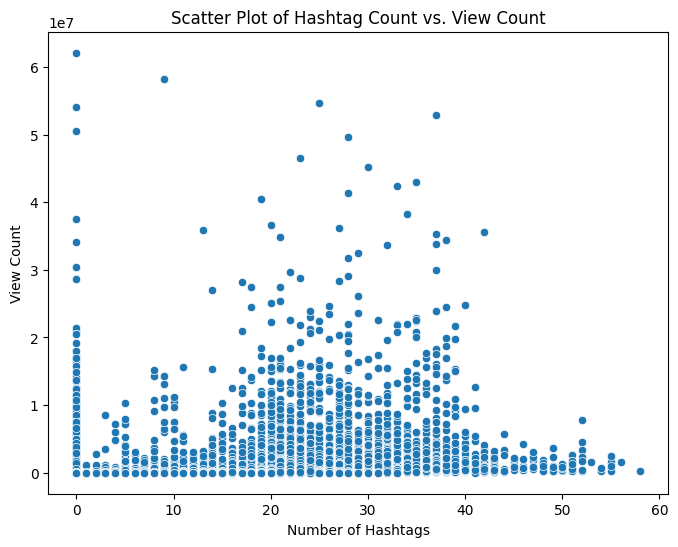

In [23]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tags_count', y='view_count', data=yt_data)
plt.title('Scatter Plot of Hashtag Count vs. View Count')
plt.xlabel('Number of Hashtags')
plt.ylabel('View Count')
plt.show()

### Title length

In [24]:
# Calculates the length of each title.
# If a title was NaN, its length will be NaN.
# .fillna(0) then replaces those NaN lengths with 0.
yt_data['title_length'] = yt_data['title'].str.len().fillna(0)

### Title originality

In [25]:
# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing Function (modified for 'title')
def preprocess_title(df, text_column):
    df[text_column] = df[text_column].str.lower()  # Convert text to lowercase
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))  # Remove special characters and punctuation
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', str(x)))  # Remove URLs
    df[text_column] = df[text_column].apply(lambda x: ' '.join(str(x).split()))  # Remove extra whitespace
    df['tokenized_text'] = df[text_column].apply(word_tokenize)  # Tokenize the text into words
    stop_words = set(stopwords.words('english'))  # Get the set of English stopwords
    df['filtered_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])  # Remove stopwords
    lemmatizer = WordNetLemmatizer()  # Initialize the WordNet lemmatizer
    df['lemmatized_text'] = df['filtered_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])  # Lemmatize the words
    df['final_title'] = df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens))  # Rejoin the lemmatized words into a string
    return df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20193694\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20193694\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20193694\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# Apply Preprocessing to 'title'
yt_data = preprocess_title(yt_data, 'title')

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the model (ensure this is done before calling the function)
model = SentenceTransformer('all-mpnet-base-v2')

def calculate_title_originality_revised(df):
    """
    Calculates title originality for each video, excluding similarity to videos 
    from the creator's own channel. This version is also much more efficient.
    """
    print("Encoding all titles into embeddings...")
    # Get embeddings for all titles in the dataframe
    # Ensure your preprocessed text is in the 'final_title' column
    title_embeddings = model.encode(df['final_title'].tolist(), show_progress_bar=True)

    print("Calculating the full pairwise cosine similarity matrix...")
   
    # Calculate the similarity matrix for all videos against all other videos ONCE.
    # This is much faster than doing it inside the loop.
    similarity_matrix = cosine_similarity(title_embeddings)

    print("Creating a corresponding list of channel names for filtering...")
    # --- NEW STEP: Get Channel Names for Filtering ---
    # Create a NumPy array of channel names that aligns with the similarity matrix
    channel_names = df['channel_name'].values

    title_originality_scores = []
    
    print("Calculating originality scores (excluding same-channel similarity)...")
    # --- MODIFIED LOOP ---
    for i in range(len(df)):
        # Get the channel name for the current video (row i)
        current_channel = channel_names[i]

        # Create a boolean mask to identify all videos from OTHER channels
        other_channels_mask = (channel_names != current_channel)

        # Check if there are any other channels in the dataset to compare against
        if np.any(other_channels_mask):
            # Select the similarity scores for the current video against
            # only the columns of videos from other channels.
            similarities_to_other_channels = similarity_matrix[i, other_channels_mask]
            
            # Find the highest similarity score among those other-channel videos
            max_sim = np.max(similarities_to_other_channels)
        else:
            # If all videos are from the same channel, it's 100% original.
            max_sim = 0.0
            
        originality_score = 1 - max_sim
        title_originality_scores.append(max(0, originality_score))

    df['title_originality'] = title_originality_scores
    return df

# --- How to use the new function ---
# Make sure your yt_data has been preprocessed and has the 'final_title' and 'channel_name' columns.
yt_data = calculate_title_originality_revised(yt_data.copy())

print("\n'title_originality' column successfully recalculated!")
print(yt_data[['title', 'channel_name', 'title_originality']].head())

Encoding all titles into embeddings...


Batches: 100%|██████████| 197/197 [01:43<00:00,  1.90it/s]


Calculating the full pairwise cosine similarity matrix...
Creating a corresponding list of channel names for filtering...
Calculating originality scores (excluding same-channel similarity)...

'title_originality' column successfully recalculated!
                                               title   channel_name  \
0               christmas smores cookies recipe food  James Charles   
1  youll never guess who i transformed into hallo...  James Charles   
2  avatar halloween transformation avatar makeup ...  James Charles   
3                         cant believe this happened  James Charles   
4                     bentley bentayga honest review  James Charles   

   title_originality  
0           0.522766  
1           0.245265  
2           0.239434  
3           0.475926  
4           0.594714  


## Control variables

### Nr of subscribers for each channel
- retrieved with YT API

In [ ]:
import pandas as pd
import numpy as np
from googleapiclient.discovery import build

# --- Configuration ---
API_KEY = 'API_KEY'  # Replace with your actual YouTube Data API key

# Build YouTube API service
youtube = build("youtube", "v3", developerKey=API_KEY)

# --- Fetch Subscriber Counts from API ---

# 1. Get all unique Channel IDs from your dataset
channel_ids = yt_data['channel_id'].unique().tolist()

# Prepare a list to store channel ID and their subscriber counts
subscribers_data = []
BATCH_SIZE = 50 # Max IDs per channels.list API request

print(f"Starting to fetch subscriber counts for {len(channel_ids)} unique channels...")

# Loop through channel IDs in batches
for i in range(0, len(channel_ids), BATCH_SIZE):
    batch_ids = channel_ids[i:i + BATCH_SIZE]
    ids_string = ','.join(batch_ids)

    try:
        request = youtube.channels().list(
            part='statistics', # Request the 'statistics' part for subscriber count
            id=ids_string
        )
        response = request.execute()

        for item in response.get('items', []):
            channel_id = item['id']
            statistics = item.get('statistics', {}) # Get the statistics object, default to empty dict

            # IMPORTANT: Check for hidden subscriber count
            if statistics.get('hiddenSubscriberCount', False):
                subscriber_count = None # Or np.nan, or -1, depending on how you want to represent hidden
            else:
                # Subscriber count is returned as a string, convert to int
                subscriber_count = int(statistics.get('subscriberCount', 0)) # Default to 0 if not found for some reason

            subscribers_data.append({'channel_id': channel_id, 'subscriber_count': subscriber_count})

    except Exception as e:
        print(f"An error occurred while fetching batch {i}-{i+BATCH_SIZE} of channels: {e}")
        # For channels that failed to fetch, you might want to add them with None/NaN subscriber count
        for failed_id in batch_ids:
            if not any(d['channel_id'] == failed_id for d in subscribers_data): # Avoid adding duplicates if some in batch succeeded
                subscribers_data.append({'channel_id': failed_id, 'subscriber_count': None})

print(f"Finished fetching subscriber counts. Retrieved data for {len(subscribers_data)} channels.")

# 2. Create a new DataFrame from the collected subscriber data
subscribers_df = pd.DataFrame(subscribers_data)

# 3. Merge the subscribers DataFrame with your original yt_data DataFrame
# Perform a left merge and assign the result back to yt_data
yt_data = pd.merge(yt_data, subscribers_df, on='channel_id', how='left')

# Optional: cast the 'subscriber_count' to a numeric type if it's not already
# This will turn 'None' values into NaN, which is standard for missing numeric data.
yt_data['subscriber_count'] = pd.to_numeric(yt_data['subscriber_count'], errors='coerce')


print("\nDataFrame 'yt_data' updated directly with new 'subscriber_count' column:")
# Displaying relevant columns to check the merge
print(yt_data[['video_id', 'channel_id', 'subscriber_count']].head())

# Check for missing values specifically in the 'subscriber_count' column
# These will indicate hidden subscriber counts or API errors
print("\nMissing values (e.g., hidden subscriber counts or API errors) in 'subscriber_count' column:")
print(yt_data['subscriber_count'].isnull().sum())

Starting to fetch subscriber counts for 15 unique channels...
Finished fetching subscriber counts. Retrieved data for 15 channels.

DataFrame 'yt_data' updated directly with new 'subscriber_count' column:
      video_id                channel_id  subscriber_count
0  uz1kZQsMs6U  UCucot-Zp428OwkyRm2I7v2Q          24000000
1  sefcLe0-BtY  UCucot-Zp428OwkyRm2I7v2Q          24000000
2  L9o4ktNDU88  UCucot-Zp428OwkyRm2I7v2Q          24000000
3  Ybe2jPoYLMs  UCucot-Zp428OwkyRm2I7v2Q          24000000
4  pa5wxEcCL8Q  UCucot-Zp428OwkyRm2I7v2Q          24000000

Missing values (e.g., hidden subscriber counts or API errors) in 'subscriber_count' column:
0


In [31]:
group = yt_data.groupby('channel_name')

df2 = group.apply(lambda x: x['subscriber_count'].unique())
df2

C:\Users\20193694\AppData\Local\Temp\ipykernel_16760\924484982.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = group.apply(lambda x: x['subscriber_count'].unique())


channel_name
Ale-Jay               [611000]
Bethany Mota         [9360000]
Bretman Rock         [8770000]
Desi Perkins         [3140000]
Haley Kim            [1320000]
Huda Beauty          [4170000]
ItsLikelyMakeup       [685000]
James Charles       [24000000]
Jeffree Star        [15700000]
Lisa J                [348000]
Manny MUA            [4840000]
Michelle Phan        [8560000]
Nikkie Tutorials    [14800000]
Patrick Starrr       [4830000]
Tati                 [7990000]
dtype: object

### Posting regularly/consistency 
- either; create a column "upload_frequency" that represents the number of uploads per week/month 
- or; create a column that shows the number of days since the last upload 
- take into account how this can be used in further analysis/modelling

days since last upload:

In [ ]:
# --- Step 1: Ensure 'published_at' is in datetime format ---
yt_data['published_at'] = pd.to_datetime(yt_data['published_at'], errors='coerce')

# check the datatype after conversion:
print("Datatype of 'published_at' after conversion:")
print(yt_data['published_at'].dtype)

# --- Step 3: Run your function ---
def calculate_days_since_last_upload(df):
    """Calculates the number of days since the last upload for each video."""
    # Ensure 'published_at' is already datetime here or re-convert inside if needed
    df = df.sort_values(by=['channel_name', 'published_at'])
    df['days_since_last_upload'] = df.groupby('channel_name')['published_at'].diff().dt.days
    df = df.reset_index(drop=True) # Reset the index for clean continuous indexing
    return df

yt_data = calculate_days_since_last_upload(yt_data.copy()) # Use .copy() to avoid SettingWithCopyWarning

Datatype of 'published_at' after conversion:
datetime64[ns, UTC]


The first videos of each channel have missing value: replacing these with the channel median time since last upload

In [ ]:
import pandas as pd


yt_data['days_since_last_upload'] = yt_data.groupby('channel_name')['days_since_last_upload'].transform(
    lambda x: x.fillna(x.median())
)

# print(yt_data[['channel_name', 'published_at', 'days_since_last_upload']].head(20))

### Year, month of the year and day of the week
- use: dummy variables

In [ ]:

# Assuming your DataFrame is named 'yt_data' and 'published_at' is the column with timestamps.

# Step 1: Ensure 'published_at' is in datetime format
yt_data['published_at'] = pd.to_datetime(yt_data['published_at'], errors='coerce')

# Create the 'publish_year' column
yt_data['publish_year'] = yt_data['published_at'].dt.year

# Step 2: Create 'publish_month' as full month names
# .dt.strftime('%B') extracts the full month name (e.g., 'January', 'February')
yt_data['publish_month'] = yt_data['published_at'].dt.strftime('%B')

# Step 3: Create 'publish_day' as full day names
# .dt.strftime('%A') extracts the full weekday name (e.g., 'Monday', 'Tuesday')
yt_data['publish_day'] = yt_data['published_at'].dt.strftime('%A')

# Display the head of your DataFrame to check the new columns
print(yt_data[['published_at', 'publish_year', 'publish_month', 'publish_day']].head())


               published_at  publish_year publish_month publish_day
0 2019-12-14 22:00:02+00:00          2019      December    Saturday
1 2020-03-19 20:00:00+00:00          2020         March    Thursday
2 2020-04-02 20:00:11+00:00          2020         April    Thursday
3 2020-04-14 20:00:20+00:00          2020         April     Tuesday
4 2020-04-16 20:00:15+00:00          2020         April    Thursday


## General Preprocessing

### Drop all columns i dont need anymore 

In [35]:
yt_data.head(3)

,video_id,title,description,published_at,duration,definition,dimension,caption,licensedContent,view_count,...,tokenized_text,filtered_text,lemmatized_text,final_title,title_originality,subscriber_count,days_since_last_upload,publish_year,publish_month,publish_day
0,Oib40HSnzTE,my winter foundation routine for dry skin ale jay,In today's video I'll be showing you my winter...,2019-12-14 22:00:02+00:00,PT10M16S,hd,2d,False,True,2082,...,"[my, winter, foundation, routine, for, dry, sk...","[winter, foundation, routine, dry, skin, ale, ...","[winter, foundation, routine, dry, skin, ale, ...",winter foundation routine dry skin ale jay,0.223420,611000,5.0,2019,December,Saturday
1,0Qp8HrBLWag,best lip combos and trios for brown skin ale jay,"Hey loves,\n\nToday's video I'll be showing yo...",2020-03-19 20:00:00+00:00,PT9M12S,hd,2d,False,True,3043,...,"[best, lip, combos, and, trios, for, brown, sk...","[best, lip, combos, trios, brown, skin, ale, jay]","[best, lip, combo, trio, brown, skin, ale, jay]",best lip combo trio brown skin ale jay,0.356230,611000,95.0,2020,March,Thursday
2,p8bbq3-5dYk,my simple everyday makeup look quick 5 minute ...,"Hey loves,\n\nSo today I'll be doing a simple ...",2020-04-02 20:00:11+00:00,PT14M19S,hd,2d,False,True,1414,...,"[my, simple, everyday, makeup, look, quick, 5,...","[simple, everyday, makeup, look, quick, 5, min...","[simple, everyday, makeup, look, quick, 5, min...",simple everyday makeup look quick 5 minute bea...,0.236745,611000,14.0,2020,April,Thursday


In [36]:
yt_data.columns

Index(['video_id', 'title', 'description', 'published_at', 'duration',
       'definition', 'dimension', 'caption', 'licensedContent', 'view_count',
       'like_count', 'dislike_count', 'comment_count', 'privacy_status',
       'channel_id', 'channel_name', 'duration_minutes', 'tags', 'tags_count',
       'tags_cleaned', 'tags_originality', 'title_length', 'tokenized_text',
       'filtered_text', 'lemmatized_text', 'final_title', 'title_originality',
       'subscriber_count', 'days_since_last_upload', 'publish_year',
       'publish_month', 'publish_day'],
      dtype='object')

In [37]:
yt_data = yt_data.drop(columns=['duration', 'definition', 'caption', 'licensedContent', 'like_count', 'dislike_count', 'comment_count', 'privacy_status', 'tokenized_text', 'filtered_text', 'lemmatized_text'])

### Check datatypes and missing values 

data types

In [38]:
yt_data.dtypes

video_id                               object
title                                  object
description                            object
published_at              datetime64[ns, UTC]
dimension                              object
view_count                              int64
channel_id                             object
channel_name                           object
duration_minutes                      float64
tags                                   object
tags_count                              int64
tags_cleaned                           object
tags_originality                      float64
title_length                            int64
final_title                            object
title_originality                     float64
subscriber_count                        int64
days_since_last_upload                float64
publish_year                            int32
publish_month                          object
publish_day                            object
dtype: object

missing values

In [39]:
print(yt_data.isnull().sum())


video_id                     0
title                        0
description               1078
published_at                 0
dimension                    0
view_count                   0
channel_id                   0
channel_name                 0
duration_minutes             0
tags                         0
tags_count                   0
tags_cleaned              1208
tags_originality          1211
title_length                 0
final_title                  0
title_originality            0
subscriber_count             0
days_since_last_upload       0
publish_year                 0
publish_month                0
publish_day                  0
dtype: int64


### Handle missing values

Note to self: if i want to use description column as a variable in analysis
-> do something with this row

In [40]:
# only one missing value in the description column
yt_data[yt_data['description'].isnull()]

,video_id,title,description,published_at,dimension,view_count,channel_id,channel_name,duration_minutes,tags,...,tags_cleaned,tags_originality,title_length,final_title,title_originality,subscriber_count,days_since_last_upload,publish_year,publish_month,publish_day
53,I-67XoXsBww,eyebrow tutorial for beginners,NaN,2023-05-25 22:02:08+00:00,2d,481552,UCDJ7jU-bV_OfTg039JAFahQ,Ale-Jay,0.833333,[],...,NaN,NaN,30,eyebrow tutorial beginner,0.052645,611000,14.0,2023,May,Thursday
54,-cXNJOii-G8,makeup mistakes to avoid,NaN,2023-06-13 19:17:36+00:00,2d,91451,UCDJ7jU-bV_OfTg039JAFahQ,Ale-Jay,0.616667,[],...,NaN,NaN,24,makeup mistake avoid,0.118590,611000,18.0,2023,June,Tuesday
55,LVNiN-ueKww,makeup mistakes to avoid pt 2,NaN,2023-06-17 18:11:28+00:00,2d,118616,UCDJ7jU-bV_OfTg039JAFahQ,Ale-Jay,0.833333,[],...,NaN,NaN,30,makeup mistake avoid pt 2,0.157198,611000,3.0,2023,June,Saturday
56,QxqikwoN7rA,still confused about setting powders watch this,NaN,2023-06-27 00:36:02+00:00,2d,318181,UCDJ7jU-bV_OfTg039JAFahQ,Ale-Jay,0.916667,[],...,NaN,NaN,51,still confused setting powder watch,0.411201,611000,9.0,2023,June,Tuesday
57,4FBgUnuu3co,conceal set and bake technique,NaN,2023-07-11 20:44:55+00:00,2d,201069,UCDJ7jU-bV_OfTg039JAFahQ,Ale-Jay,0.766667,[],...,NaN,NaN,33,conceal set bake technique,0.515922,611000,14.0,2023,July,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,S7cRhS4QycM,my favorite time of year holidayparty holiday,NaN,2024-12-27 23:00:20+00:00,2d,3510,UCDHQbU57NZilrhbuZNbQcRA,Patrick Starrr,1.000000,[],...,NaN,NaN,48,favorite time year holidayparty holiday,0.438335,4830000,0.0,2024,December,Friday
5098,imlA4tof0qY,love my onesize family,NaN,2024-12-28 04:59:00+00:00,2d,3553,UCDHQbU57NZilrhbuZNbQcRA,Patrick Starrr,0.533333,[],...,NaN,NaN,30,love onesize family,0.539348,4830000,0.0,2024,December,Saturday
5099,1-zokjMRDrE,to my onesize family,NaN,2024-12-28 17:00:02+00:00,2d,2884,UCDHQbU57NZilrhbuZNbQcRA,Patrick Starrr,0.950000,[],...,NaN,NaN,24,onesize family,0.547780,4830000,0.0,2024,December,Saturday
5100,_sW0CEPi-Zo,who is that baby holidaygames game partygames,NaN,2024-12-28 23:00:25+00:00,2d,3209,UCDHQbU57NZilrhbuZNbQcRA,Patrick Starrr,0.550000,[],...,NaN,NaN,53,baby holidaygames game partygames,0.378061,4830000,0.0,2024,December,Saturday


### Some data checks for methodology

In [41]:
# number of videos/rows per channel
yt_data['channel_name'].value_counts()

channel_name
Tati                1183
Patrick Starrr       923
Lisa J               776
Manny MUA            542
Nikkie Tutorials     456
James Charles        437
Jeffree Star         383
Huda Beauty          365
ItsLikelyMakeup      323
Desi Perkins         314
Haley Kim            201
Ale-Jay              125
Bretman Rock         121
Bethany Mota          69
Michelle Phan         67
Name: count, dtype: int64

In [42]:
## Aantal videos voor en na preprocessing:
# load the csv "yt_data_complete_raw.csv" as raw 
raw = pd.read_csv("yt_data_complete_raw.csv")
print("Number of videos before preprocessing:", len(raw))

Number of videos before preprocessing: 9883


In [43]:
# average of the nr of videos per channel after preprocessing
median_videos_per_channel = yt_data['channel_name'].value_counts().median()
print("Median number of videos per channel after preprocessing:", median_videos_per_channel)

# average of the nr of videos per channel after preprocessing
avg_videos_per_channel = yt_data['channel_name'].value_counts().mean()
print("Average number of videos per channel after preprocessing:", avg_videos_per_channel)

Median number of videos per channel after preprocessing: 365.0
Average number of videos per channel after preprocessing: 419.0


# save the data to csv


In [44]:
# save the dataframe to a csv file
yt_data.to_csv("yt_preprocessed.csv", index=False)